In [2]:
import MDAnalysis as mda
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [7]:
pwd

'/media/hlu/Elements/000-ICMAB-UPC-2-years-2023-2024/structural-info-of-CCR7-on-DMPC-bilayer/msm/2nd-PCA-CAatoms'

ls ../protein-xtc/*dcd

In [3]:
files = [f"../protein-xtc/s{i}-rep{j}-alligned-to-crystal.dcd" for i in range(0,7) for j in range(1, 7)]
print(files)

['../protein-xtc/s0-rep1-alligned-to-crystal.dcd', '../protein-xtc/s0-rep2-alligned-to-crystal.dcd', '../protein-xtc/s0-rep3-alligned-to-crystal.dcd', '../protein-xtc/s0-rep4-alligned-to-crystal.dcd', '../protein-xtc/s0-rep5-alligned-to-crystal.dcd', '../protein-xtc/s0-rep6-alligned-to-crystal.dcd', '../protein-xtc/s1-rep1-alligned-to-crystal.dcd', '../protein-xtc/s1-rep2-alligned-to-crystal.dcd', '../protein-xtc/s1-rep3-alligned-to-crystal.dcd', '../protein-xtc/s1-rep4-alligned-to-crystal.dcd', '../protein-xtc/s1-rep5-alligned-to-crystal.dcd', '../protein-xtc/s1-rep6-alligned-to-crystal.dcd', '../protein-xtc/s2-rep1-alligned-to-crystal.dcd', '../protein-xtc/s2-rep2-alligned-to-crystal.dcd', '../protein-xtc/s2-rep3-alligned-to-crystal.dcd', '../protein-xtc/s2-rep4-alligned-to-crystal.dcd', '../protein-xtc/s2-rep5-alligned-to-crystal.dcd', '../protein-xtc/s2-rep6-alligned-to-crystal.dcd', '../protein-xtc/s3-rep1-alligned-to-crystal.dcd', '../protein-xtc/s3-rep2-alligned-to-crystal.dcd',

In [5]:
# Load trajectory data
dcd_files = ['../protein-xtc/s0-rep1-alligned-to-crystal.dcd', '../protein-xtc/s0-rep2-alligned-to-crystal.dcd', '../protein-xtc/s0-rep3-alligned-to-crystal.dcd', '../protein-xtc/s0-rep4-alligned-to-crystal.dcd', '../protein-xtc/s0-rep5-alligned-to-crystal.dcd', '../protein-xtc/s0-rep6-alligned-to-crystal.dcd', '../protein-xtc/s1-rep1-alligned-to-crystal.dcd', '../protein-xtc/s1-rep2-alligned-to-crystal.dcd', '../protein-xtc/s1-rep3-alligned-to-crystal.dcd', '../protein-xtc/s1-rep4-alligned-to-crystal.dcd', '../protein-xtc/s1-rep5-alligned-to-crystal.dcd', '../protein-xtc/s1-rep6-alligned-to-crystal.dcd', '../protein-xtc/s2-rep1-alligned-to-crystal.dcd', '../protein-xtc/s2-rep2-alligned-to-crystal.dcd', '../protein-xtc/s2-rep3-alligned-to-crystal.dcd', '../protein-xtc/s2-rep4-alligned-to-crystal.dcd', '../protein-xtc/s2-rep5-alligned-to-crystal.dcd', '../protein-xtc/s2-rep6-alligned-to-crystal.dcd', '../protein-xtc/s3-rep1-alligned-to-crystal.dcd', '../protein-xtc/s3-rep2-alligned-to-crystal.dcd', '../protein-xtc/s3-rep3-alligned-to-crystal.dcd', '../protein-xtc/s3-rep4-alligned-to-crystal.dcd', '../protein-xtc/s3-rep5-alligned-to-crystal.dcd', '../protein-xtc/s3-rep6-alligned-to-crystal.dcd', '../protein-xtc/s4-rep1-alligned-to-crystal.dcd', '../protein-xtc/s4-rep2-alligned-to-crystal.dcd', '../protein-xtc/s4-rep3-alligned-to-crystal.dcd', '../protein-xtc/s4-rep4-alligned-to-crystal.dcd', '../protein-xtc/s4-rep5-alligned-to-crystal.dcd', '../protein-xtc/s4-rep6-alligned-to-crystal.dcd', '../protein-xtc/s5-rep1-alligned-to-crystal.dcd', '../protein-xtc/s5-rep2-alligned-to-crystal.dcd', '../protein-xtc/s5-rep3-alligned-to-crystal.dcd', '../protein-xtc/s5-rep4-alligned-to-crystal.dcd', '../protein-xtc/s5-rep5-alligned-to-crystal.dcd', '../protein-xtc/s5-rep6-alligned-to-crystal.dcd', '../protein-xtc/s6-rep1-alligned-to-crystal.dcd', '../protein-xtc/s6-rep2-alligned-to-crystal.dcd', '../protein-xtc/s6-rep3-alligned-to-crystal.dcd', '../protein-xtc/s6-rep4-alligned-to-crystal.dcd', '../protein-xtc/s6-rep5-alligned-to-crystal.dcd', '../protein-xtc/s6-rep6-alligned-to-crystal.dcd']
u = mda.Universe('../protein.psf', *dcd_files)

/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [ ]:
#pdb = 'protein.pdb'
#file=['s0/rep1/step8.1_protein.xtc', 's0/rep1/step8.2_protein.xtc', 's0/rep1/step8.3_protein.xtc', 's0/rep1/step8.4_protein.xtc', 's0/rep1/step8.5_protein.xtc', 's0/rep1/step8.6_protein.xtc', 's0/rep1/step8.7_protein.xtc', 's0/rep1/step8.8_protein.xtc', 's0/rep1/step8.9_protein.xtc', 's0/rep1/step8.10_protein.xtc', 's0/rep2/step8.1_protein.xtc', 's0/rep2/step8.2_protein.xtc', 's0/rep2/step8.3_protein.xtc', 's0/rep2/step8.4_protein.xtc', 's0/rep2/step8.5_protein.xtc', 's0/rep2/step8.6_protein.xtc', 's0/rep2/step8.7_protein.xtc', 's0/rep2/step8.8_protein.xtc', 's0/rep2/step8.9_protein.xtc', 's0/rep2/step8.10_protein.xtc', 's0/rep3/step8.1_protein.xtc', 's0/rep3/step8.2_protein.xtc', 's0/rep3/step8.3_protein.xtc', 's0/rep3/step8.4_protein.xtc', 's0/rep3/step8.5_protein.xtc', 's0/rep3/step8.6_protein.xtc', 's0/rep3/step8.7_protein.xtc', 's0/rep3/step8.8_protein.xtc', 's0/rep3/step8.9_protein.xtc', 's0/rep3/step8.10_protein.xtc', 's0/rep4/step8.1_protein.xtc', 's0/rep4/step8.2_protein.xtc', 's0/rep4/step8.3_protein.xtc', 's0/rep4/step8.4_protein.xtc', 's0/rep4/step8.5_protein.xtc', 's0/rep4/step8.6_protein.xtc', 's0/rep4/step8.7_protein.xtc', 's0/rep4/step8.8_protein.xtc', 's0/rep4/step8.9_protein.xtc', 's0/rep4/step8.10_protein.xtc', 's0/rep5/step8.1_protein.xtc', 's0/rep5/step8.2_protein.xtc', 's0/rep5/step8.3_protein.xtc', 's0/rep5/step8.4_protein.xtc', 's0/rep5/step8.5_protein.xtc', 's0/rep5/step8.6_protein.xtc', 's0/rep5/step8.7_protein.xtc', 's0/rep5/step8.8_protein.xtc', 's0/rep5/step8.9_protein.xtc', 's0/rep5/step8.10_protein.xtc', 's0/rep6/step8.1_protein.xtc', 's0/rep6/step8.2_protein.xtc', 's0/rep6/step8.3_protein.xtc', 's0/rep6/step8.4_protein.xtc', 's0/rep6/step8.5_protein.xtc', 's0/rep6/step8.6_protein.xtc', 's0/rep6/step8.7_protein.xtc', 's0/rep6/step8.8_protein.xtc', 's0/rep6/step8.9_protein.xtc', 's0/rep6/step8.10_protein.xtc', 's1/rep1/step8.1_protein.xtc', 's1/rep1/step8.2_protein.xtc', 's1/rep1/step8.3_protein.xtc', 's1/rep1/step8.4_protein.xtc', 's1/rep1/step8.5_protein.xtc', 's1/rep1/step8.6_protein.xtc', 's1/rep1/step8.7_protein.xtc', 's1/rep1/step8.8_protein.xtc', 's1/rep1/step8.9_protein.xtc', 's1/rep1/step8.10_protein.xtc', 's1/rep2/step8.1_protein.xtc', 's1/rep2/step8.2_protein.xtc', 's1/rep2/step8.3_protein.xtc', 's1/rep2/step8.4_protein.xtc', 's1/rep2/step8.5_protein.xtc', 's1/rep2/step8.6_protein.xtc', 's1/rep2/step8.7_protein.xtc', 's1/rep2/step8.8_protein.xtc', 's1/rep2/step8.9_protein.xtc', 's1/rep2/step8.10_protein.xtc', 's1/rep3/step8.1_protein.xtc', 's1/rep3/step8.2_protein.xtc', 's1/rep3/step8.3_protein.xtc', 's1/rep3/step8.4_protein.xtc', 's1/rep3/step8.5_protein.xtc', 's1/rep3/step8.6_protein.xtc', 's1/rep3/step8.7_protein.xtc', 's1/rep3/step8.8_protein.xtc', 's1/rep3/step8.9_protein.xtc', 's1/rep3/step8.10_protein.xtc', 's1/rep4/step8.1_protein.xtc', 's1/rep4/step8.2_protein.xtc', 's1/rep4/step8.3_protein.xtc', 's1/rep4/step8.4_protein.xtc', 's1/rep4/step8.5_protein.xtc', 's1/rep4/step8.6_protein.xtc', 's1/rep4/step8.7_protein.xtc', 's1/rep4/step8.8_protein.xtc', 's1/rep4/step8.9_protein.xtc', 's1/rep4/step8.10_protein.xtc', 's1/rep5/step8.1_protein.xtc', 's1/rep5/step8.2_protein.xtc', 's1/rep5/step8.3_protein.xtc', 's1/rep5/step8.4_protein.xtc', 's1/rep5/step8.5_protein.xtc', 's1/rep5/step8.6_protein.xtc', 's1/rep5/step8.7_protein.xtc', 's1/rep5/step8.8_protein.xtc', 's1/rep5/step8.9_protein.xtc', 's1/rep5/step8.10_protein.xtc', 's1/rep6/step8.1_protein.xtc', 's1/rep6/step8.2_protein.xtc', 's1/rep6/step8.3_protein.xtc', 's1/rep6/step8.4_protein.xtc', 's1/rep6/step8.5_protein.xtc', 's1/rep6/step8.6_protein.xtc', 's1/rep6/step8.7_protein.xtc', 's1/rep6/step8.8_protein.xtc', 's1/rep6/step8.9_protein.xtc', 's1/rep6/step8.10_protein.xtc', 's2/rep1/step8.1_protein.xtc', 's2/rep1/step8.2_protein.xtc', 's2/rep1/step8.3_protein.xtc', 's2/rep1/step8.4_protein.xtc', 's2/rep1/step8.5_protein.xtc', 's2/rep1/step8.6_protein.xtc', 's2/rep1/step8.7_protein.xtc', 's2/rep1/step8.8_protein.xtc', 's2/rep1/step8.9_protein.xtc', 's2/rep1/step8.10_protein.xtc', 's2/rep2/step8.1_protein.xtc', 's2/rep2/step8.2_protein.xtc', 's2/rep2/step8.3_protein.xtc', 's2/rep2/step8.4_protein.xtc', 's2/rep2/step8.5_protein.xtc', 's2/rep2/step8.6_protein.xtc', 's2/rep2/step8.7_protein.xtc', 's2/rep2/step8.8_protein.xtc', 's2/rep2/step8.9_protein.xtc', 's2/rep2/step8.10_protein.xtc', 's2/rep3/step8.1_protein.xtc', 's2/rep3/step8.2_protein.xtc', 's2/rep3/step8.3_protein.xtc', 's2/rep3/step8.4_protein.xtc', 's2/rep3/step8.5_protein.xtc', 's2/rep3/step8.6_protein.xtc', 's2/rep3/step8.7_protein.xtc', 's2/rep3/step8.8_protein.xtc', 's2/rep3/step8.9_protein.xtc', 's2/rep3/step8.10_protein.xtc', 's2/rep4/step8.1_protein.xtc', 's2/rep4/step8.2_protein.xtc', 's2/rep4/step8.3_protein.xtc', 's2/rep4/step8.4_protein.xtc', 's2/rep4/step8.5_protein.xtc', 's2/rep4/step8.6_protein.xtc', 's2/rep4/step8.7_protein.xtc', 's2/rep4/step8.8_protein.xtc', 's2/rep4/step8.9_protein.xtc', 's2/rep4/step8.10_protein.xtc', 's2/rep5/step8.1_protein.xtc', 's2/rep5/step8.2_protein.xtc', 's2/rep5/step8.3_protein.xtc', 's2/rep5/step8.4_protein.xtc', 's2/rep5/step8.5_protein.xtc', 's2/rep5/step8.6_protein.xtc', 's2/rep5/step8.7_protein.xtc', 's2/rep5/step8.8_protein.xtc', 's2/rep5/step8.9_protein.xtc', 's2/rep5/step8.10_protein.xtc', 's2/rep6/step8.1_protein.xtc', 's2/rep6/step8.2_protein.xtc', 's2/rep6/step8.3_protein.xtc', 's2/rep6/step8.4_protein.xtc', 's2/rep6/step8.5_protein.xtc', 's2/rep6/step8.6_protein.xtc', 's2/rep6/step8.7_protein.xtc', 's2/rep6/step8.8_protein.xtc', 's2/rep6/step8.9_protein.xtc', 's2/rep6/step8.10_protein.xtc', 's3/rep1/step8.1_protein.xtc', 's3/rep1/step8.2_protein.xtc', 's3/rep1/step8.3_protein.xtc', 's3/rep1/step8.4_protein.xtc', 's3/rep1/step8.5_protein.xtc', 's3/rep1/step8.6_protein.xtc', 's3/rep1/step8.7_protein.xtc', 's3/rep1/step8.8_protein.xtc', 's3/rep1/step8.9_protein.xtc', 's3/rep1/step8.10_protein.xtc', 's3/rep2/step8.1_protein.xtc', 's3/rep2/step8.2_protein.xtc', 's3/rep2/step8.3_protein.xtc', 's3/rep2/step8.4_protein.xtc', 's3/rep2/step8.5_protein.xtc', 's3/rep2/step8.6_protein.xtc', 's3/rep2/step8.7_protein.xtc', 's3/rep2/step8.8_protein.xtc', 's3/rep2/step8.9_protein.xtc', 's3/rep2/step8.10_protein.xtc', 's3/rep3/step8.1_protein.xtc', 's3/rep3/step8.2_protein.xtc', 's3/rep3/step8.3_protein.xtc', 's3/rep3/step8.4_protein.xtc', 's3/rep3/step8.5_protein.xtc', 's3/rep3/step8.6_protein.xtc', 's3/rep3/step8.7_protein.xtc', 's3/rep3/step8.8_protein.xtc', 's3/rep3/step8.9_protein.xtc', 's3/rep3/step8.10_protein.xtc', 's3/rep4/step8.1_protein.xtc', 's3/rep4/step8.2_protein.xtc', 's3/rep4/step8.3_protein.xtc', 's3/rep4/step8.4_protein.xtc', 's3/rep4/step8.5_protein.xtc', 's3/rep4/step8.6_protein.xtc', 's3/rep4/step8.7_protein.xtc', 's3/rep4/step8.8_protein.xtc', 's3/rep4/step8.9_protein.xtc', 's3/rep4/step8.10_protein.xtc', 's3/rep5/step8.1_protein.xtc', 's3/rep5/step8.2_protein.xtc', 's3/rep5/step8.3_protein.xtc', 's3/rep5/step8.4_protein.xtc', 's3/rep5/step8.5_protein.xtc', 's3/rep5/step8.6_protein.xtc', 's3/rep5/step8.7_protein.xtc', 's3/rep5/step8.8_protein.xtc', 's3/rep5/step8.9_protein.xtc', 's3/rep5/step8.10_protein.xtc', 's3/rep6/step8.1_protein.xtc', 's3/rep6/step8.2_protein.xtc', 's3/rep6/step8.3_protein.xtc', 's3/rep6/step8.4_protein.xtc', 's3/rep6/step8.5_protein.xtc', 's3/rep6/step8.6_protein.xtc', 's3/rep6/step8.7_protein.xtc', 's3/rep6/step8.8_protein.xtc', 's3/rep6/step8.9_protein.xtc', 's3/rep6/step8.10_protein.xtc', 's4/rep1/step8.1_protein.xtc', 's4/rep1/step8.2_protein.xtc', 's4/rep1/step8.3_protein.xtc', 's4/rep1/step8.4_protein.xtc', 's4/rep1/step8.5_protein.xtc', 's4/rep1/step8.6_protein.xtc', 's4/rep1/step8.7_protein.xtc', 's4/rep1/step8.8_protein.xtc', 's4/rep1/step8.9_protein.xtc', 's4/rep1/step8.10_protein.xtc', 's4/rep2/step8.1_protein.xtc', 's4/rep2/step8.2_protein.xtc', 's4/rep2/step8.3_protein.xtc', 's4/rep2/step8.4_protein.xtc', 's4/rep2/step8.5_protein.xtc', 's4/rep2/step8.6_protein.xtc', 's4/rep2/step8.7_protein.xtc', 's4/rep2/step8.8_protein.xtc', 's4/rep2/step8.9_protein.xtc', 's4/rep2/step8.10_protein.xtc', 's4/rep3/step8.1_protein.xtc', 's4/rep3/step8.2_protein.xtc', 's4/rep3/step8.3_protein.xtc', 's4/rep3/step8.4_protein.xtc', 's4/rep3/step8.5_protein.xtc', 's4/rep3/step8.6_protein.xtc', 's4/rep3/step8.7_protein.xtc', 's4/rep3/step8.8_protein.xtc', 's4/rep3/step8.9_protein.xtc', 's4/rep3/step8.10_protein.xtc', 's4/rep4/step8.1_protein.xtc', 's4/rep4/step8.2_protein.xtc', 's4/rep4/step8.3_protein.xtc', 's4/rep4/step8.4_protein.xtc', 's4/rep4/step8.5_protein.xtc', 's4/rep4/step8.6_protein.xtc', 's4/rep4/step8.7_protein.xtc', 's4/rep4/step8.8_protein.xtc', 's4/rep4/step8.9_protein.xtc', 's4/rep4/step8.10_protein.xtc', 's4/rep5/step8.1_protein.xtc', 's4/rep5/step8.2_protein.xtc', 's4/rep5/step8.3_protein.xtc', 's4/rep5/step8.4_protein.xtc', 's4/rep5/step8.5_protein.xtc', 's4/rep5/step8.6_protein.xtc', 's4/rep5/step8.7_protein.xtc', 's4/rep5/step8.8_protein.xtc', 's4/rep5/step8.9_protein.xtc', 's4/rep5/step8.10_protein.xtc', 's4/rep6/step8.1_protein.xtc', 's4/rep6/step8.2_protein.xtc', 's4/rep6/step8.3_protein.xtc', 's4/rep6/step8.4_protein.xtc', 's4/rep6/step8.5_protein.xtc', 's4/rep6/step8.6_protein.xtc', 's4/rep6/step8.7_protein.xtc', 's4/rep6/step8.8_protein.xtc', 's4/rep6/step8.9_protein.xtc', 's4/rep6/step8.10_protein.xtc', 's5/rep1/step8.1_protein.xtc', 's5/rep1/step8.2_protein.xtc', 's5/rep1/step8.3_protein.xtc', 's5/rep1/step8.4_protein.xtc', 's5/rep1/step8.5_protein.xtc', 's5/rep1/step8.6_protein.xtc', 's5/rep1/step8.7_protein.xtc', 's5/rep1/step8.8_protein.xtc', 's5/rep1/step8.9_protein.xtc', 's5/rep1/step8.10_protein.xtc', 's5/rep2/step8.1_protein.xtc', 's5/rep2/step8.2_protein.xtc', 's5/rep2/step8.3_protein.xtc', 's5/rep2/step8.4_protein.xtc', 's5/rep2/step8.5_protein.xtc', 's5/rep2/step8.6_protein.xtc', 's5/rep2/step8.7_protein.xtc', 's5/rep2/step8.8_protein.xtc', 's5/rep2/step8.9_protein.xtc', 's5/rep2/step8.10_protein.xtc', 's5/rep3/step8.1_protein.xtc', 's5/rep3/step8.2_protein.xtc', 's5/rep3/step8.3_protein.xtc', 's5/rep3/step8.4_protein.xtc', 's5/rep3/step8.5_protein.xtc', 's5/rep3/step8.6_protein.xtc', 's5/rep3/step8.7_protein.xtc', 's5/rep3/step8.8_protein.xtc', 's5/rep3/step8.9_protein.xtc', 's5/rep3/step8.10_protein.xtc', 's5/rep4/step8.1_protein.xtc', 's5/rep4/step8.2_protein.xtc', 's5/rep4/step8.3_protein.xtc', 's5/rep4/step8.4_protein.xtc', 's5/rep4/step8.5_protein.xtc', 's5/rep4/step8.6_protein.xtc', 's5/rep4/step8.7_protein.xtc', 's5/rep4/step8.8_protein.xtc', 's5/rep4/step8.9_protein.xtc', 's5/rep4/step8.10_protein.xtc', 's5/rep5/step8.1_protein.xtc', 's5/rep5/step8.2_protein-new.xtc', 's5/rep5/step8.3_protein.xtc', 's5/rep5/step8.4_protein.xtc', 's5/rep5/step8.5_protein.xtc', 's5/rep5/step8.6_protein.xtc', 's5/rep5/step8.7_protein.xtc', 's5/rep5/step8.8_protein.xtc', 's5/rep5/step8.9_protein.xtc', 's5/rep5/step8.10_protein.xtc', 's5/rep6/step8.1_protein.xtc', 's5/rep6/step8.2_protein.xtc', 's5/rep6/step8.3_protein.xtc', 's5/rep6/step8.4_protein.xtc', 's5/rep6/step8.5_protein.xtc', 's5/rep6/step8.6_protein.xtc', 's5/rep6/step8.7_protein.xtc', 's5/rep6/step8.8_protein.xtc', 's5/rep6/step8.9_protein.xtc', 's5/rep6/step8.10_protein.xtc', 's6/rep1/step8.1_protein.xtc', 's6/rep1/step8.2_protein.xtc', 's6/rep1/step8.3_protein.xtc', 's6/rep1/step8.4_protein.xtc', 's6/rep1/step8.5_protein.xtc', 's6/rep1/step8.6_protein.xtc', 's6/rep1/step8.7_protein.xtc', 's6/rep1/step8.8_protein.xtc', 's6/rep1/step8.9_protein.xtc', 's6/rep1/step8.10_protein.xtc', 's6/rep2/step8.1_protein.xtc', 's6/rep2/step8.2_protein.xtc', 's6/rep2/step8.3_protein.xtc', 's6/rep2/step8.4_protein.xtc', 's6/rep2/step8.5_protein.xtc', 's6/rep2/step8.6_protein.xtc', 's6/rep2/step8.7_protein.xtc', 's6/rep2/step8.8_protein.xtc', 's6/rep2/step8.9_protein.xtc', 's6/rep2/step8.10_protein.xtc', 's6/rep3/step8.1_protein.xtc', 's6/rep3/step8.2_protein.xtc', 's6/rep3/step8.3_protein.xtc', 's6/rep3/step8.4_protein.xtc', 's6/rep3/step8.5_protein.xtc', 's6/rep3/step8.6_protein.xtc', 's6/rep3/step8.7_protein.xtc', 's6/rep3/step8.8_protein.xtc', 's6/rep3/step8.9_protein.xtc', 's6/rep3/step8.10_protein.xtc', 's6/rep4/step8.1_protein.xtc', 's6/rep4/step8.2_protein.xtc', 's6/rep4/step8.3_protein.xtc', 's6/rep4/step8.4_protein.xtc', 's6/rep4/step8.5_protein.xtc', 's6/rep4/step8.6_protein.xtc', 's6/rep4/step8.7_protein.xtc', 's6/rep4/step8.8_protein.xtc', 's6/rep4/step8.9_protein.xtc', 's6/rep4/step8.10_protein.xtc', 's6/rep5/step8.1_protein.xtc', 's6/rep5/step8.2_protein.xtc', 's6/rep5/step8.3_protein.xtc', 's6/rep5/step8.4_protein.xtc', 's6/rep5/step8.5_protein.xtc', 's6/rep5/step8.6_protein.xtc', 's6/rep5/step8.7_protein.xtc', 's6/rep5/step8.8_protein.xtc', 's6/rep5/step8.9_protein.xtc', 's6/rep5/step8.10_protein.xtc', 's6/rep6/step8.1_protein.xtc', 's6/rep6/step8.2_protein.xtc', 's6/rep6/step8.3_protein.xtc', 's6/rep6/step8.4_protein.xtc', 's6/rep6/step8.5_protein.xtc', 's6/rep6/step8.6_protein.xtc', 's6/rep6/step8.7_protein.xtc', 's6/rep6/step8.8_protein.xtc', 's6/rep6/step8.9_protein.xtc', 's6/rep6/step8.10_protein.xtc']

#pdb = 'protein.pdb'
files=['../protein-xtc/s0-rep1-alligned-to-crystal.dcd', '../protein-xtc/s0-rep2-alligned-to-crystal.dcd', '../protein-xtc/s0-rep3-alligned-to-crystal.dcd', '../protein-xtc/s0-rep4-alligned-to-crystal.dcd', '../protein-xtc/s0-rep5-alligned-to-crystal.dcd', '../protein-xtc/s0-rep6-alligned-to-crystal.dcd', '../protein-xtc/s0-rep7-alligned-to-crystal.dcd', '../protein-xtc/s0-rep8-alligned-to-crystal.dcd', '../protein-xtc/s0-rep9-alligned-to-crystal.dcd', '../protein-xtc/s0-rep10-alligned-to-crystal.dcd', '../protein-xtc/s1-rep1-alligned-to-crystal.dcd', '../protein-xtc/s1-rep2-alligned-to-crystal.dcd', '../protein-xtc/s1-rep3-alligned-to-crystal.dcd', '../protein-xtc/s1-rep4-alligned-to-crystal.dcd', '../protein-xtc/s1-rep5-alligned-to-crystal.dcd', '../protein-xtc/s1-rep6-alligned-to-crystal.dcd', '../protein-xtc/s1-rep7-alligned-to-crystal.dcd', '../protein-xtc/s1-rep8-alligned-to-crystal.dcd', '../protein-xtc/s1-rep9-alligned-to-crystal.dcd', '../protein-xtc/s1-rep10-alligned-to-crystal.dcd', '../protein-xtc/s2-rep1-alligned-to-crystal.dcd', '../protein-xtc/s2-rep2-alligned-to-crystal.dcd', '../protein-xtc/s2-rep3-alligned-to-crystal.dcd', '../protein-xtc/s2-rep4-alligned-to-crystal.dcd', '../protein-xtc/s2-rep5-alligned-to-crystal.dcd', '../protein-xtc/s2-rep6-alligned-to-crystal.dcd', '../protein-xtc/s2-rep7-alligned-to-crystal.dcd', '../protein-xtc/s2-rep8-alligned-to-crystal.dcd', '../protein-xtc/s2-rep9-alligned-to-crystal.dcd', '../protein-xtc/s2-rep10-alligned-to-crystal.dcd', '../protein-xtc/s3-rep1-alligned-to-crystal.dcd', '../protein-xtc/s3-rep2-alligned-to-crystal.dcd', '../protein-xtc/s3-rep3-alligned-to-crystal.dcd', '../protein-xtc/s3-rep4-alligned-to-crystal.dcd', '../protein-xtc/s3-rep5-alligned-to-crystal.dcd', '../protein-xtc/s3-rep6-alligned-to-crystal.dcd', '../protein-xtc/s3-rep7-alligned-to-crystal.dcd', '../protein-xtc/s3-rep8-alligned-to-crystal.dcd', '../protein-xtc/s3-rep9-alligned-to-crystal.dcd', '../protein-xtc/s3-rep10-alligned-to-crystal.dcd', '../protein-xtc/s4-rep1-alligned-to-crystal.dcd', '../protein-xtc/s4-rep2-alligned-to-crystal.dcd', '../protein-xtc/s4-rep3-alligned-to-crystal.dcd', '../protein-xtc/s4-rep4-alligned-to-crystal.dcd', '../protein-xtc/s4-rep5-alligned-to-crystal.dcd', '../protein-xtc/s4-rep6-alligned-to-crystal.dcd', '../protein-xtc/s4-rep7-alligned-to-crystal.dcd', '../protein-xtc/s4-rep8-alligned-to-crystal.dcd', '../protein-xtc/s4-rep9-alligned-to-crystal.dcd', '../protein-xtc/s4-rep10-alligned-to-crystal.dcd', '../protein-xtc/s5-rep1-alligned-to-crystal.dcd', '../protein-xtc/s5-rep2-alligned-to-crystal.dcd', '../protein-xtc/s5-rep3-alligned-to-crystal.dcd', '../protein-xtc/s5-rep4-alligned-to-crystal.dcd', '../protein-xtc/s5-rep5-alligned-to-crystal.dcd', '../protein-xtc/s5-rep6-alligned-to-crystal.dcd', '../protein-xtc/s5-rep7-alligned-to-crystal.dcd', '../protein-xtc/s5-rep8-alligned-to-crystal.dcd', '../protein-xtc/s5-rep9-alligned-to-crystal.dcd', '../protein-xtc/s5-rep10-alligned-to-crystal.dcd', '../protein-xtc/s6-rep1-alligned-to-crystal.dcd', '../protein-xtc/s6-rep2-alligned-to-crystal.dcd', '../protein-xtc/s6-rep3-alligned-to-crystal.dcd', '../protein-xtc/s6-rep4-alligned-to-crystal.dcd', '../protein-xtc/s6-rep5-alligned-to-crystal.dcd', '../protein-xtc/s6-rep6-alligned-to-crystal.dcd', '../protein-xtc/s6-rep7-alligned-to-crystal.dcd', '../protein-xtc/s6-rep8-alligned-to-crystal.dcd', '../protein-xtc/s6-rep9-alligned-to-crystal.dcd', '../protein-xtc/s6-rep10-alligned-to-crystal.dcd']
# Load trajectory data
u = mda.Universe('../protein-xtc/protein.psf', *files)

# save ED_data without losing trajectory segmentation
#this one works!
np.savez("ED_data.npz", *ED_data)

#to load it back
loaded = np.load("ED_data.npz")
ED_data_loaded = [loaded[key] for key in loaded.files]

# save ED_data without losing trajectory segmentation
#this one works!
np.savez("ED_data1-transmemDomain.npz", *ED_data1)



Frame numbers corresponding to each centroid:
Cluster 0: Frame 1090600
Cluster 1: Frame 772900
Cluster 2: Frame 766400
Cluster 3: Frame 255100
Cluster 4: Frame 1520300
Cluster 5: Frame 860900
Cluster 6: Frame 505200


/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Fo

Cluster densities (from most to least populated):
Cluster 6: 0.2156 (Fraction of frames: 4528/21004)
Cluster 1: 0.1978 (Fraction of frames: 4154/21004)
Cluster 4: 0.1797 (Fraction of frames: 3774/21004)
Cluster 3: 0.1328 (Fraction of frames: 2789/21004)
Cluster 2: 0.1126 (Fraction of frames: 2365/21004)
Cluster 0: 0.1017 (Fraction of frames: 2137/21004)
Cluster 5: 0.0598 (Fraction of frames: 1257/21004)


/tmp/ipykernel_24241/2188329545.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


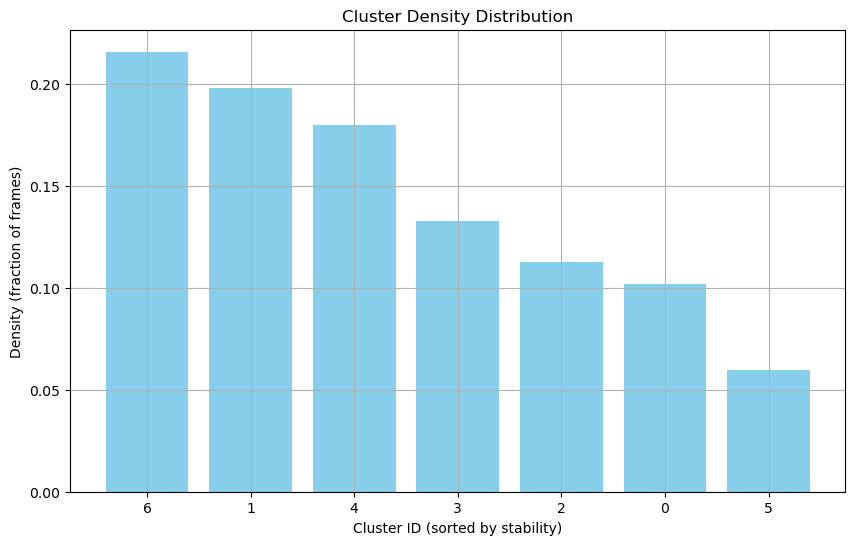

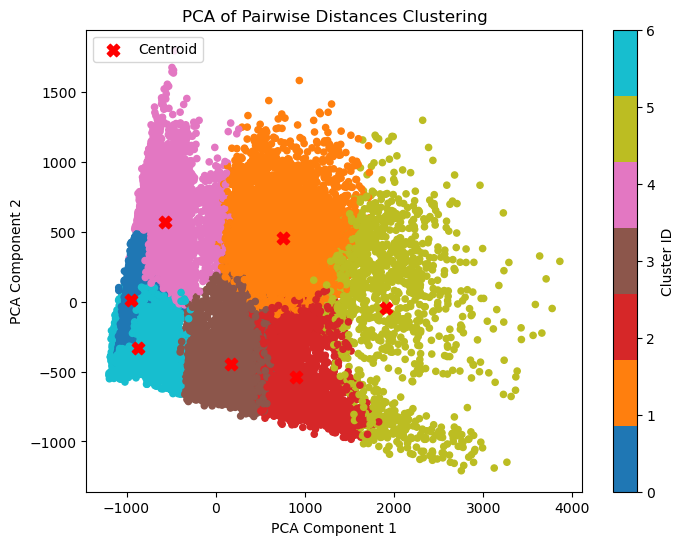

Clustering complete. Centroid locations plotted and saved.


In [3]:
# Select CA atoms for distance calculation
ca_atoms = u.select_atoms('protein and name CA')

# Select every second CA atom
selected_ca_indices = np.arange(0, len(ca_atoms), 2)
selected_ca_atoms = ca_atoms[selected_ca_indices]

# Initialize list to store flattened distances
flattened_distances = []
frame_indices = []

# Process every frame
total_frames = len(u.trajectory)

for frame_index in range(0, total_frames, 100):  # <-- add step=10 tp process every 10th frame
    # Set the trajectory to the current frame
    u.trajectory[frame_index]
    
    # Compute pairwise distances for selected CA atoms
    positions = selected_ca_atoms.positions
    dist_matrix = squareform(pdist(positions))
    # Flatten distance matrix
    flattened_distance = dist_matrix[np.triu_indices(len(selected_ca_atoms), k=1)]
    
    # Append flattened distance and frame index
    flattened_distances.append(flattened_distance)
    frame_indices.append(frame_index)

# Convert list of flattened distances to numpy array
flattened_distances = np.array(flattened_distances)

# save flattened_distances data without losing trajectory segmentation
#np.savez("flattened_distances.npz", *flattened_distances)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_distances = pca.fit_transform(flattened_distances)

# Apply KMeans clustering to the distance matrix
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_distances)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Transform centroids into PCA space
centroids_pca = pca.transform(centroids)

# Find the closest frame to each centroid
centroid_frames = []
for centroid in centroids:
    distances = np.linalg.norm(flattened_distances - centroid, axis=1)
    closest_frame = np.argmin(distances)
    centroid_frames.append(frame_indices[closest_frame])

# Print the frame numbers corresponding to each centroid
print("Frame numbers corresponding to each centroid:")
for i, frame in enumerate(centroid_frames):
    print(f"Cluster {i}: Frame {frame}")

# Save the centroid conformation of each cluster to PDB
for i, frame in enumerate(centroid_frames):
    u.trajectory[frame]
    selected_ca_atoms.write(f"Pairwise_distances_centroid_cluster_{n_clusters}clusters_{i}-275-400k.pdb")

# Calculate density distribution of clusters (proportion of frames in each cluster)
cluster_counts = np.bincount(labels)
total_frames = len(labels)
cluster_density = cluster_counts / total_frames

# Sort clusters by density
sorted_indices = np.argsort(cluster_density)[::-1]
sorted_density = cluster_density[sorted_indices]
sorted_labels = np.arange(n_clusters)[sorted_indices]

# Print sorted densities
print("Cluster densities (from most to least populated):")
for i, (idx, density) in enumerate(zip(sorted_labels, sorted_density)):
    print(f"Cluster {idx}: {density:.4f} (Fraction of frames: {cluster_counts[idx]}/{total_frames})")

# Define a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10', n_clusters)
cmap = mcolors.ListedColormap(colors(range(n_clusters)))

# Define bounds and labels for the colorbar
bounds = np.arange(n_clusters + 1) - 0.5
colorbar_labels = [str(i) for i in range(n_clusters)]

# Plot the density distribution of clusters
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), sorted_density, color='skyblue')
plt.xticks(range(n_clusters), sorted_labels)
plt.xlabel('Cluster ID (sorted by stability)')
plt.ylabel('Density (fraction of frames)')
plt.title('Cluster Density Distribution')
plt.savefig('cluster_density_distribution_pairwise_distances_7clusters-275-400k.jpg', dpi=300)
plt.grid(True)
plt.show()

# Plot the 2D distribution of clusters (PCA components)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_distances[:, 0], reduced_distances[:, 1], c=labels, cmap=cmap, s=20)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=80, label='Centroid')
cbar = plt.colorbar(scatter, ticks=np.arange(n_clusters))
cbar.set_label('Cluster ID')
cbar.set_ticklabels(colorbar_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Pairwise Distances Clustering')
plt.legend(loc='upper left')
plt.savefig('PCA_2d_clustering_pairwise_distances_7clusters_with_centroids-275-400k.jpg', dpi=300)
plt.show()

print("Clustering complete. Centroid locations plotted and saved.")

Frame numbers corresponding to each centroid:
Cluster 0: Frame 1090600
Cluster 1: Frame 1276750
Cluster 2: Frame 766300
Cluster 3: Frame 1522100
Cluster 4: Frame 836150
Cluster 5: Frame 1906950
Cluster 6: Frame 1502350
Cluster 7: Frame 835200
Cluster 8: Frame 353450
Cluster 9: Frame 161050


/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Fo

Cluster densities (from most to least populated):
Cluster 3: 0.1585 (Fraction of frames: 6657/42008)
Cluster 8: 0.1331 (Fraction of frames: 5590/42008)
Cluster 1: 0.1291 (Fraction of frames: 5422/42008)
Cluster 5: 0.1250 (Fraction of frames: 5253/42008)
Cluster 6: 0.1241 (Fraction of frames: 5214/42008)
Cluster 0: 0.0976 (Fraction of frames: 4100/42008)
Cluster 2: 0.0832 (Fraction of frames: 3495/42008)
Cluster 4: 0.0761 (Fraction of frames: 3197/42008)
Cluster 9: 0.0382 (Fraction of frames: 1605/42008)
Cluster 7: 0.0351 (Fraction of frames: 1475/42008)


/tmp/ipykernel_24241/4169540067.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


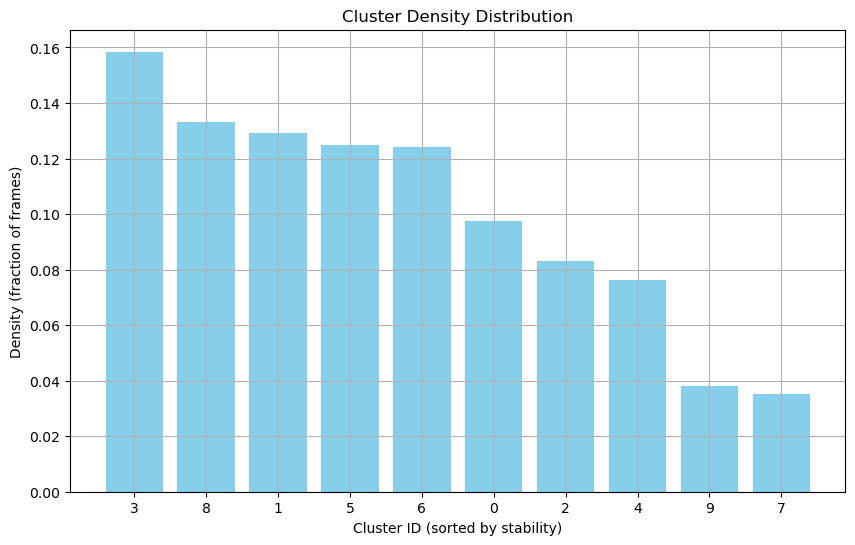

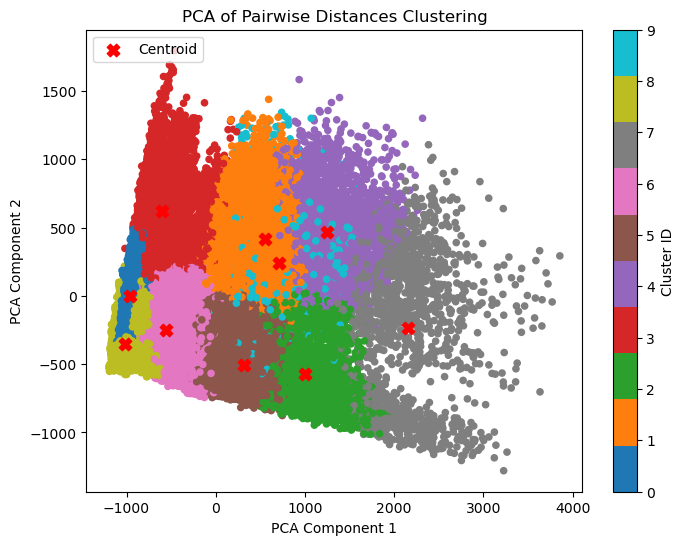

Clustering complete. Centroid locations plotted and saved.


In [4]:
# Select CA atoms for distance calculation
ca_atoms = u.select_atoms('protein and name CA')

# Select every second CA atom
selected_ca_indices = np.arange(0, len(ca_atoms), 2)
selected_ca_atoms = ca_atoms[selected_ca_indices]

# Initialize list to store flattened distances
flattened_distances = []
frame_indices = []

# Process every frame
total_frames = len(u.trajectory)

for frame_index in range(0, total_frames, 50):  # <-- add step=10 tp process every 10th frame
    # Set the trajectory to the current frame
    u.trajectory[frame_index]
    
    # Compute pairwise distances for selected CA atoms
    positions = selected_ca_atoms.positions
    dist_matrix = squareform(pdist(positions))
    # Flatten distance matrix
    flattened_distance = dist_matrix[np.triu_indices(len(selected_ca_atoms), k=1)]
    
    # Append flattened distance and frame index
    flattened_distances.append(flattened_distance)
    frame_indices.append(frame_index)

# Convert list of flattened distances to numpy array
flattened_distances = np.array(flattened_distances)

# save flattened_distances data without losing trajectory segmentation
#np.savez("flattened_distances.npz", *flattened_distances)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_distances = pca.fit_transform(flattened_distances)

# Apply KMeans clustering to the distance matrix
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_distances)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Transform centroids into PCA space
centroids_pca = pca.transform(centroids)

# Find the closest frame to each centroid
centroid_frames = []
for centroid in centroids:
    distances = np.linalg.norm(flattened_distances - centroid, axis=1)
    closest_frame = np.argmin(distances)
    centroid_frames.append(frame_indices[closest_frame])

# Print the frame numbers corresponding to each centroid
print("Frame numbers corresponding to each centroid:")
for i, frame in enumerate(centroid_frames):
    print(f"Cluster {i}: Frame {frame}")

# Save the centroid conformation of each cluster to PDB
for i, frame in enumerate(centroid_frames):
    u.trajectory[frame]
    selected_ca_atoms.write(f"Pairwise_distances_centroid_cluster_{n_clusters}clusters_{i}-275-400k.pdb")

# Calculate density distribution of clusters (proportion of frames in each cluster)
cluster_counts = np.bincount(labels)
total_frames = len(labels)
cluster_density = cluster_counts / total_frames

# Sort clusters by density
sorted_indices = np.argsort(cluster_density)[::-1]
sorted_density = cluster_density[sorted_indices]
sorted_labels = np.arange(n_clusters)[sorted_indices]

# Print sorted densities
print("Cluster densities (from most to least populated):")
for i, (idx, density) in enumerate(zip(sorted_labels, sorted_density)):
    print(f"Cluster {idx}: {density:.4f} (Fraction of frames: {cluster_counts[idx]}/{total_frames})")

# Define a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10', n_clusters)
cmap = mcolors.ListedColormap(colors(range(n_clusters)))

# Define bounds and labels for the colorbar
bounds = np.arange(n_clusters + 1) - 0.5
colorbar_labels = [str(i) for i in range(n_clusters)]

# Plot the density distribution of clusters
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), sorted_density, color='skyblue')
plt.xticks(range(n_clusters), sorted_labels)
plt.xlabel('Cluster ID (sorted by stability)')
plt.ylabel('Density (fraction of frames)')
plt.title('Cluster Density Distribution')
plt.savefig('2nd-cluster_density_distribution_pairwise_distances_10clusters.jpg', dpi=300)
plt.grid(True)
plt.show()

# Plot the 2D distribution of clusters (PCA components)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_distances[:, 0], reduced_distances[:, 1], c=labels, cmap=cmap, s=20)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=80, label='Centroid')
cbar = plt.colorbar(scatter, ticks=np.arange(n_clusters))
cbar.set_label('Cluster ID')
cbar.set_ticklabels(colorbar_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Pairwise Distances Clustering')
plt.legend(loc='upper left')
plt.savefig('2nd-PCA_2d_clustering_pairwise_distances_10clusters.jpg', dpi=300)
plt.show()

print("Clustering complete. Centroid locations plotted and saved.")

Frame numbers corresponding to each centroid:
Cluster 0: Frame 514150
Cluster 1: Frame 812500
Cluster 2: Frame 226650
Cluster 3: Frame 1126050
Cluster 4: Frame 1234450
Cluster 5: Frame 1357900
Cluster 6: Frame 1753350
Cluster 7: Frame 860900


/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Fo

Cluster densities (from most to least populated):
Cluster 0: 0.1997 (Fraction of frames: 8389/42008)
Cluster 3: 0.1918 (Fraction of frames: 8058/42008)
Cluster 5: 0.1346 (Fraction of frames: 5653/42008)
Cluster 1: 0.1216 (Fraction of frames: 5109/42008)
Cluster 6: 0.1186 (Fraction of frames: 4981/42008)
Cluster 4: 0.1078 (Fraction of frames: 4529/42008)
Cluster 2: 0.0821 (Fraction of frames: 3449/42008)
Cluster 7: 0.0438 (Fraction of frames: 1840/42008)


/tmp/ipykernel_24241/854444304.py:83: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


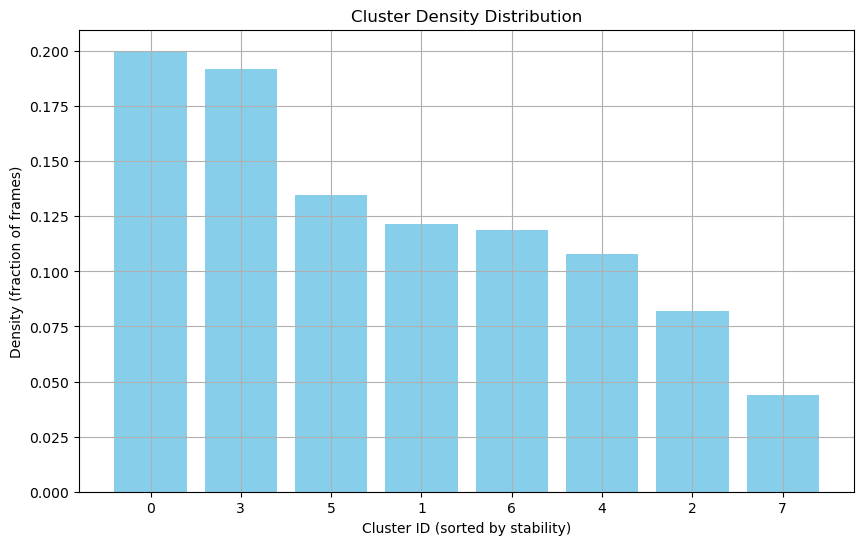

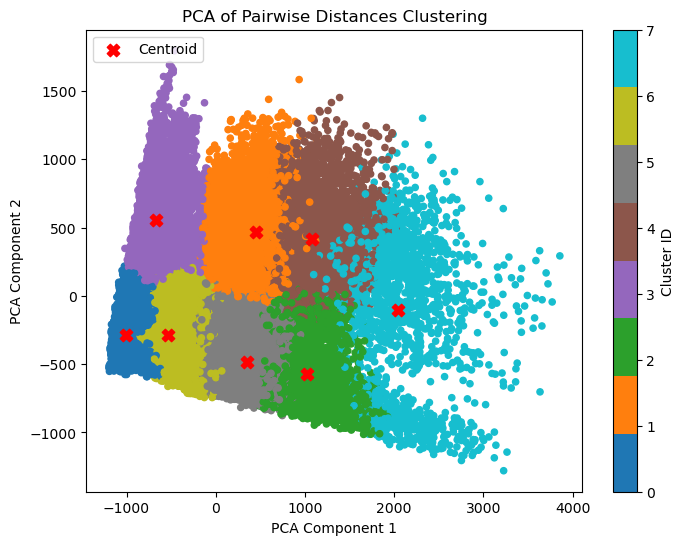

Clustering complete. Centroid locations plotted and saved.


In [5]:
# Select CA atoms for distance calculation
ca_atoms = u.select_atoms('protein and name CA')

# Select every second CA atom
selected_ca_indices = np.arange(0, len(ca_atoms), 2)
selected_ca_atoms = ca_atoms[selected_ca_indices]

# Initialize list to store flattened distances
flattened_distances = []
frame_indices = []

# Process every frame
total_frames = len(u.trajectory)

for frame_index in range(0, total_frames, 50):  # <-- add step=10 tp process every 10th frame
    # Set the trajectory to the current frame
    u.trajectory[frame_index]
    
    # Compute pairwise distances for selected CA atoms
    positions = selected_ca_atoms.positions
    dist_matrix = squareform(pdist(positions))
    # Flatten distance matrix
    flattened_distance = dist_matrix[np.triu_indices(len(selected_ca_atoms), k=1)]
    
    # Append flattened distance and frame index
    flattened_distances.append(flattened_distance)
    frame_indices.append(frame_index)

# Convert list of flattened distances to numpy array
flattened_distances = np.array(flattened_distances)

# save flattened_distances data without losing trajectory segmentation
#np.savez("flattened_distances.npz", *flattened_distances)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_distances = pca.fit_transform(flattened_distances)

# Apply KMeans clustering to the distance matrix
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_distances)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Transform centroids into PCA space
centroids_pca = pca.transform(centroids)

# Find the closest frame to each centroid
centroid_frames = []
for centroid in centroids:
    distances = np.linalg.norm(flattened_distances - centroid, axis=1)
    closest_frame = np.argmin(distances)
    centroid_frames.append(frame_indices[closest_frame])

# Print the frame numbers corresponding to each centroid
print("Frame numbers corresponding to each centroid:")
for i, frame in enumerate(centroid_frames):
    print(f"Cluster {i}: Frame {frame}")

# Save the centroid conformation of each cluster to PDB
for i, frame in enumerate(centroid_frames):
    u.trajectory[frame]
    selected_ca_atoms.write(f"Pairwise_distances_centroid_cluster_{n_clusters}clusters_{i}-275-400k.pdb")

# Calculate density distribution of clusters (proportion of frames in each cluster)
cluster_counts = np.bincount(labels)
total_frames = len(labels)
cluster_density = cluster_counts / total_frames

# Sort clusters by density
sorted_indices = np.argsort(cluster_density)[::-1]
sorted_density = cluster_density[sorted_indices]
sorted_labels = np.arange(n_clusters)[sorted_indices]

# Print sorted densities
print("Cluster densities (from most to least populated):")
for i, (idx, density) in enumerate(zip(sorted_labels, sorted_density)):
    print(f"Cluster {idx}: {density:.4f} (Fraction of frames: {cluster_counts[idx]}/{total_frames})")

# Define a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10', n_clusters)
cmap = mcolors.ListedColormap(colors(range(n_clusters)))

# Define bounds and labels for the colorbar
bounds = np.arange(n_clusters + 1) - 0.5
colorbar_labels = [str(i) for i in range(n_clusters)]

# Plot the density distribution of clusters
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), sorted_density, color='skyblue')
plt.xticks(range(n_clusters), sorted_labels)
plt.xlabel('Cluster ID (sorted by stability)')
plt.ylabel('Density (fraction of frames)')
plt.title('Cluster Density Distribution')
plt.savefig('2nd-cluster_density_distribution_pairwise_distances_8clusters.jpg', dpi=300)
plt.grid(True)
plt.show()

# Plot the 2D distribution of clusters (PCA components)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_distances[:, 0], reduced_distances[:, 1], c=labels, cmap=cmap, s=20)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=80, label='Centroid')
cbar = plt.colorbar(scatter, ticks=np.arange(n_clusters))
cbar.set_label('Cluster ID')
cbar.set_ticklabels(colorbar_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Pairwise Distances Clustering')
plt.legend(loc='upper left')
plt.savefig('2nd-PCA_2d_clustering_pairwise_distances_8clusters.jpg', dpi=300)
plt.show()

print("Clustering complete. Centroid locations plotted and saved.")

In [3]:
# Select CA atoms for distance calculation
ca_atoms = u.select_atoms('protein and resid 50:330 and name CA')

# Select every second CA atom
selected_ca_indices = np.arange(0, len(ca_atoms), 2)
selected_ca_atoms = ca_atoms[selected_ca_indices]

# Initialize list to store flattened distances
flattened_distances = []
frame_indices = []

# Process every frame
total_frames = len(u.trajectory)

for frame_index in range(0, total_frames, 50):  # <-- add step=10 tp process every 10th frame
    # Set the trajectory to the current frame
    u.trajectory[frame_index]
    
    # Compute pairwise distances for selected CA atoms
    positions = selected_ca_atoms.positions
    dist_matrix = squareform(pdist(positions))
    # Flatten distance matrix
    flattened_distance = dist_matrix[np.triu_indices(len(selected_ca_atoms), k=1)]
    
    # Append flattened distance and frame index
    flattened_distances.append(flattened_distance)
    frame_indices.append(frame_index)

# Convert list of flattened distances to numpy array
flattened_distances = np.array(flattened_distances)

# save flattened_distances data without losing trajectory segmentation
#np.savez("flattened_distances.npz", *flattened_distances)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_distances = pca.fit_transform(flattened_distances)

# Apply KMeans clustering to the distance matrix
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_distances)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Transform centroids into PCA space
centroids_pca = pca.transform(centroids)

# Find the closest frame to each centroid
centroid_frames = []
for centroid in centroids:
    distances = np.linalg.norm(flattened_distances - centroid, axis=1)
    closest_frame = np.argmin(distances)
    centroid_frames.append(frame_indices[closest_frame])

# Print the frame numbers corresponding to each centroid
print("Frame numbers corresponding to each centroid:")
for i, frame in enumerate(centroid_frames):
    print(f"Cluster {i}: Frame {frame}")

# Save the centroid conformation of each cluster to PDB
for i, frame in enumerate(centroid_frames):
    u.trajectory[frame]
    selected_ca_atoms.write(f"2nd-cluster_Pairwise_distances_centroid_cluster_{n_clusters}clusters_{i}-5clusters-transmembrane-CA.pdb")

# Calculate density distribution of clusters (proportion of frames in each cluster)
cluster_counts = np.bincount(labels)
total_frames = len(labels)
cluster_density = cluster_counts / total_frames

# Sort clusters by density
sorted_indices = np.argsort(cluster_density)[::-1]
sorted_density = cluster_density[sorted_indices]
sorted_labels = np.arange(n_clusters)[sorted_indices]

# Print sorted densities
print("Cluster densities (from most to least populated):")
for i, (idx, density) in enumerate(zip(sorted_labels, sorted_density)):
    print(f"Cluster {idx}: {density:.4f} (Fraction of frames: {cluster_counts[idx]}/{total_frames})")

# Define a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10', n_clusters)
cmap = mcolors.ListedColormap(colors(range(n_clusters)))

# Define bounds and labels for the colorbar
bounds = np.arange(n_clusters + 1) - 0.5
colorbar_labels = [str(i) for i in range(n_clusters)]

# Plot the density distribution of clusters
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), sorted_density, color='skyblue')
plt.xticks(range(n_clusters), sorted_labels)
plt.xlabel('Cluster ID (sorted by stability)')
plt.ylabel('Density (fraction of frames)')
plt.title('Cluster Density Distribution')
plt.savefig('2nd-cluster_density_distribution_pairwise_distances_5clusters-transmembrane-CA.jpg', dpi=300)
plt.grid(True)
plt.show()

# Plot the 2D distribution of clusters (PCA components)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_distances[:, 0], reduced_distances[:, 1], c=labels, cmap=cmap, s=20)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=80, label='Centroid')
cbar = plt.colorbar(scatter, ticks=np.arange(n_clusters))
cbar.set_label('Cluster ID')
cbar.set_ticklabels(colorbar_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Pairwise Distances Clustering')
plt.legend(loc='upper left')
plt.savefig('2nd-PCA_2d_clustering_pairwise_distances_5clusters-transmembrane-CA.jpg', dpi=300)
plt.show()

print("Clustering complete. Centroid locations plotted and saved.")

KeyboardInterrupt: 

Frame numbers corresponding to each centroid:
Cluster 0: Frame 1102000
Cluster 1: Frame 223500
Cluster 2: Frame 1756500
Cluster 3: Frame 455000
Cluster 4: Frame 1586500


/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'altLocs' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'icodes' Using default value of ' '
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'chainIDs' Using default value of ''
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'occupancies' Using default value of '1.0'
  warnings.warn("Found no information for attr: '{}'"
/home/huixia/anaconda3/lib/python3.12/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Fo

Cluster densities (from most to least populated):
Cluster 2: 0.2804 (Fraction of frames: 1178/4201)
Cluster 4: 0.2345 (Fraction of frames: 985/4201)
Cluster 1: 0.2007 (Fraction of frames: 843/4201)
Cluster 0: 0.1443 (Fraction of frames: 606/4201)
Cluster 3: 0.1402 (Fraction of frames: 589/4201)


/tmp/ipykernel_26334/1334268163.py:84: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', n_clusters)


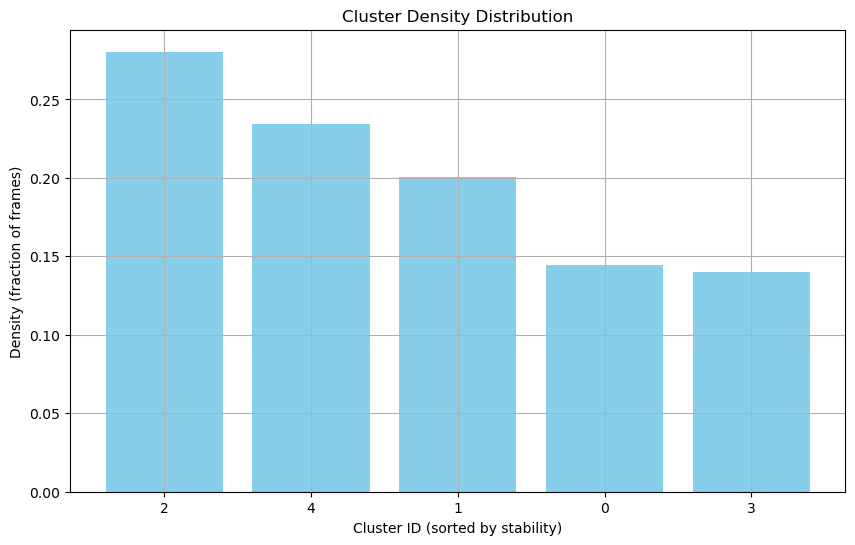

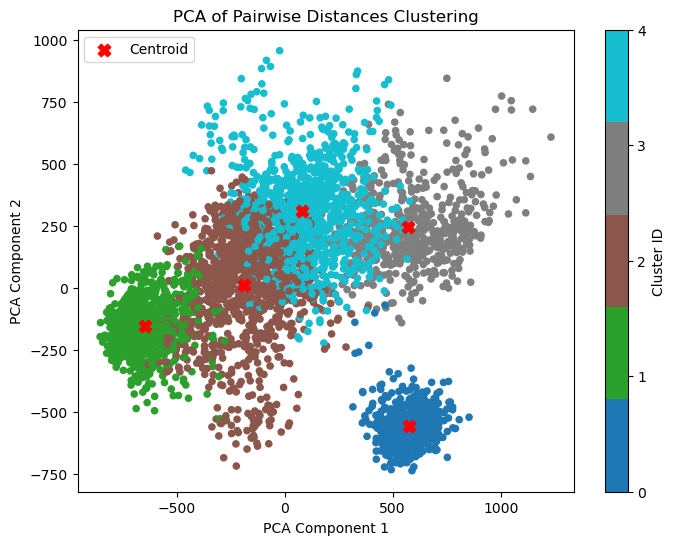

Clustering complete. Centroid locations plotted and saved.


In [8]:
# Select CA atoms for distance calculation
#ca_atoms = u.select_atoms('protein and resid 50:330 and not name H*')
ca_atoms = u.select_atoms('protein and resid 50:330 and backbone')

# Select every second CA atom
selected_ca_indices = np.arange(0, len(ca_atoms), 2)
selected_ca_atoms = ca_atoms[selected_ca_indices]

# Initialize list to store flattened distances
flattened_distances = []
frame_indices = []

# Process every frame
total_frames = len(u.trajectory)

for frame_index in range(0, total_frames, 500):  # <-- add step=10 tp process every 10th frame
    # Set the trajectory to the current frame
    u.trajectory[frame_index]
    
    # Compute pairwise distances for selected CA atoms
    positions = selected_ca_atoms.positions
    dist_matrix = squareform(pdist(positions))
    # Flatten distance matrix
    flattened_distance = dist_matrix[np.triu_indices(len(selected_ca_atoms), k=1)]
    
    # Append flattened distance and frame index
    flattened_distances.append(flattened_distance)
    frame_indices.append(frame_index)

# Convert list of flattened distances to numpy array
flattened_distances = np.array(flattened_distances)

# save flattened_distances data without losing trajectory segmentation
#np.savez("flattened_distances.npz", *flattened_distances)

# Apply PCA for dimensionality reduction (optional)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_distances = pca.fit_transform(flattened_distances)

# Apply KMeans clustering to the distance matrix
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(flattened_distances)

# Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Transform centroids into PCA space
centroids_pca = pca.transform(centroids)

# Find the closest frame to each centroid
centroid_frames = []
for centroid in centroids:
    distances = np.linalg.norm(flattened_distances - centroid, axis=1)
    closest_frame = np.argmin(distances)
    centroid_frames.append(frame_indices[closest_frame])

# Print the frame numbers corresponding to each centroid
print("Frame numbers corresponding to each centroid:")
for i, frame in enumerate(centroid_frames):
    print(f"Cluster {i}: Frame {frame}")

# Save the centroid conformation of each cluster to PDB
for i, frame in enumerate(centroid_frames):
    u.trajectory[frame]
    selected_ca_atoms.write(f"cluster_{n_clusters}clusters_{i}-5clusters-transmembrane-backbone.pdb")

# Calculate density distribution of clusters (proportion of frames in each cluster)
cluster_counts = np.bincount(labels)
total_frames = len(labels)
cluster_density = cluster_counts / total_frames

# Sort clusters by density
sorted_indices = np.argsort(cluster_density)[::-1]
sorted_density = cluster_density[sorted_indices]
sorted_labels = np.arange(n_clusters)[sorted_indices]

# Print sorted densities
print("Cluster densities (from most to least populated):")
for i, (idx, density) in enumerate(zip(sorted_labels, sorted_density)):
    print(f"Cluster {idx}: {density:.4f} (Fraction of frames: {cluster_counts[idx]}/{total_frames})")

# Define a custom colormap with distinct colors
colors = plt.cm.get_cmap('tab10', n_clusters)
cmap = mcolors.ListedColormap(colors(range(n_clusters)))

# Define bounds and labels for the colorbar
bounds = np.arange(n_clusters + 1) - 0.5
colorbar_labels = [str(i) for i in range(n_clusters)]

# Plot the density distribution of clusters
plt.figure(figsize=(10, 6))
plt.bar(range(n_clusters), sorted_density, color='skyblue')
plt.xticks(range(n_clusters), sorted_labels)
plt.xlabel('Cluster ID (sorted by stability)')
plt.ylabel('Density (fraction of frames)')
plt.title('Cluster Density Distribution')
plt.savefig('2nd-cluster_density_distribution_pairwise_distances_5clusters-transmembrane-backbone.jpg', dpi=300)
plt.grid(True)
plt.show()

# Plot the 2D distribution of clusters (PCA components)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_distances[:, 0], reduced_distances[:, 1], c=labels, cmap=cmap, s=20)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=80, label='Centroid')
cbar = plt.colorbar(scatter, ticks=np.arange(n_clusters))
cbar.set_label('Cluster ID')
cbar.set_ticklabels(colorbar_labels)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Pairwise Distances Clustering')
plt.legend(loc='upper left')
plt.savefig('2nd-PCA_2d_clustering_pairwise_distances_5clusters-transmembrane-backbone.jpg', dpi=300)
plt.show()

print("Clustering complete. Centroid locations plotted and saved.")